In [41]:
import torch
import torch.utils.data as data
import torchvision.transforms as transforms
import PIL.Image
from torchvision.utils import make_grid # to plot
import time

In [42]:
from data import RawWaterMeterDS
from models.DigitsRecgnitionNetwork import *
from models.RotationRegressionNetwork import *
from models.SingleObjectDetectionNetwork import *
from utils import tuple_collate_fn, show

In [38]:
from models.WaterMeterRecognizer import water_meter_recognizer_pretrained

In [39]:
model = water_meter_recognizer_pretrained()
model.eval()
DS = RawWaterMeterDS()

In [75]:
# test in cpu
model.to('cpu')
x = DS[0][0].unsqueeze(0).to('cpu')
X_batch = tuple(DS[i][0].to('cpu') for i in range(32))
start = time.time()
for _ in range(100):
    model(x)
single_end = time.time()
for _ in range(20):
    model(X_batch)
batch_end = time.time()

print(f'Inferring on CPU(AMD R7-5800H Laptop) one image with resolution: ({x.shape[-2]}x{x.shape[-1]}), '
      f'once inference costs {(single_end - start) / 100:.2f}s in average.\n'
      f'32 images batch inference, one image costs {(batch_end - single_end) / 20 / 32:.2f}s in average')

Inferring on CPU(AMD R7-5800H Laptop) one image with resolution: (1280x960), once inference costs 0.49s in average.
32 images batch inference, one image costs 0.37s in average


In [34]:
# test in gpu
model.to('cuda')
x = DS[0][0].unsqueeze(0).to('cuda')
X_batch = tuple(DS[i][0].to('cuda') for i in range(32))
start = time.time()
for _ in range(100):
    model(x)
single_end = time.time()
for _ in range(20):
    model(X_batch)
batch_end = time.time()

print(f'Inferring on GPU(NVIDIA RTX 3060 Laptop) one image with resolution: ({x.shape[-2]}x{x.shape[-1]}), '
      f'once inference costs {(single_end - start) / 100:.2f}s in average.\n'
      f'32 images batch inference, one image costs {(batch_end - single_end) / 20 / 32:.2f}s in average')

Inferring on GPU(NVIDIA RTX 3060 Laptop) one image with resolution: (1280x960), once inference costs 0.10s in average.
32 images batch inference, one image costs 0.09s in average


prediction:  [['00030', '00031']]


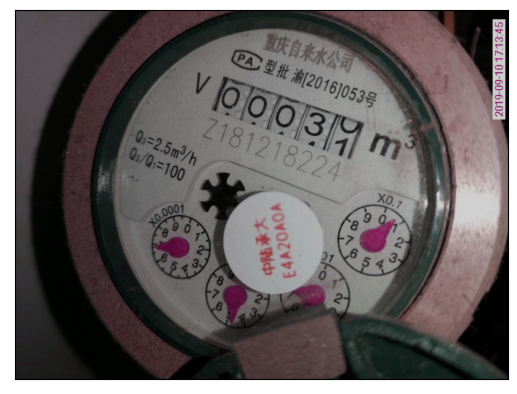

In [74]:
print('prediction: ', model(DS[21][0].unsqueeze(0).to('cuda')))
show(make_grid(DS[21][0]))